In [1]:
from lionagi.core import System, Instruction

sys_mul = System("you are asked to perform as a function picker and parameter provider")
instruction = Instruction(
    "Think step by step, understand the following basic math question and provide parameters for function calling."
)

question1 = "A school is ordering laptops for its students. If each classroom has 25 students and the school wants to provide a laptop for each student in its 8 classrooms, how many laptops in total does the school need to order?"
question2 = "A bakery sells cupcakes in boxes of 6. If a customer wants to buy enough cupcakes for a party of 48 people, with each person getting one cupcake, how many boxes of cupcakes does the customer need to buy?"

context = {"Question1": question1, "question2": question2}

In [2]:
from lionagi.core import func_to_tool


def multiply(number1: float, number2: float):
    """
    Perform multiplication on two numbers.

    Args:
        number1: First number to multiply.
        number2: Second number to multiply.

    Returns:
        The product of number1 and number2.

    """
    return number1 * number2


tool_m = func_to_tool(multiply)

In [3]:
from lionagi.core import ActionSelection

action = ActionSelection(
    action="ReAct", action_kwargs={"auto": True}
)  # action: any availble flow functions, default to 'chat'

In [4]:
from lionagi.core import Structure

struct_mul = Structure()
struct_mul.add_node(sys_mul)
struct_mul.add_node(instruction)
struct_mul.add_node(tool_m[0])
struct_mul.add_node(action)
struct_mul.add_relationship(sys_mul, instruction)
struct_mul.add_relationship(instruction, tool_m[0])
struct_mul.add_relationship(instruction, action)

In [5]:
# %pip install networkx

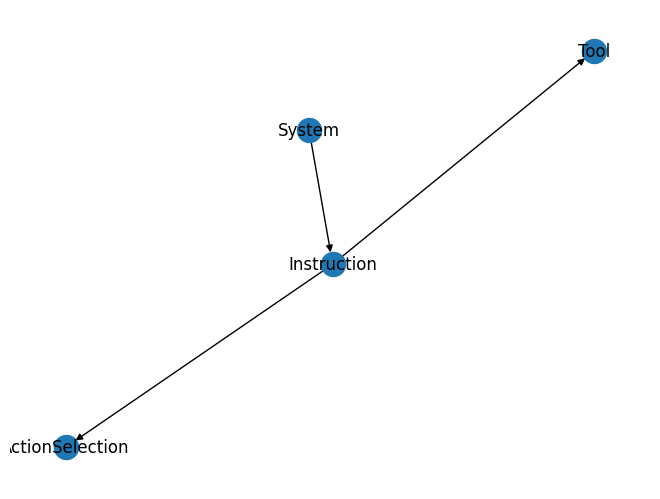

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

g = struct_mul.graph.to_networkx()
labels = nx.get_node_attributes(g, "class_name")
nx.draw(g, labels=labels)

In [7]:
from lionagi.core import ExecutableBranch, BaseAgent


# output_parser_func parameter: agent self
def multiply_output_parser(agent):
    return agent.executable.responses


executable = ExecutableBranch()

calc = BaseAgent(
    structure=struct_mul,
    executable_obj=executable,
    output_parser=multiply_output_parser,
)

In [8]:
result = await calc.execute(context=context)

------------------Welcome: system--------------------


system: you are asked to perform as a function picker and parameter provider

user: Think step by step, understand the following basic math question and provide parameters for function calling.

assistant: None

-----------------------------------------------------


In [9]:
for i in calc.executable.branch.messages["content"]:
    print(i)

{"system_info": "you are asked to perform as a function picker and parameter provider"}
{"instruction": {"Notice": "\nyou have 2 step left in current task. if available, integrate previous tool responses. perform reasoning and prepare action plan according to available tools only, apply divide and conquer technique.\n", "Task": "Think step by step, understand the following basic math question and provide parameters for function calling."}, "context": {"Question1": "A school is ordering laptops for its students. If each classroom has 25 students and the school wants to provide a laptop for each student in its 8 classrooms, how many laptops in total does the school need to order?", "question2": "A bakery sells cupcakes in boxes of 6. If a customer wants to buy enough cupcakes for a party of 48 people, with each person getting one cupcake, how many boxes of cupcakes does the customer need to buy?"}}
{"response": "### Step 1: Understand the Math Problems\n\n#### Problem 1: Calculating Tota

In [10]:
calc.executable.branch.messages

,node_id,timestamp,role,sender,recipient,content
0,4bd57a7969c539b514c9a86ad24591a9,2024_03_22T14_54_02_987501+00_00,system,system,assistant,"{""system_info"": ""you are asked to perform as a..."
1,c36d6f23d03d8ee8869802a77ce676bb,2024_03_22T14_54_03_869417+00_00,user,user,assistant,"{""instruction"": {""Notice"": ""\nyou have 2 step ..."
2,3cf87521b815496cbdd6427796ec927a,2024_03_22T14_54_37_144384+00_00,assistant,assistant,user,"{""response"": ""### Step 1: Understand the Math ..."
3,09a717f29a64ca8e07f38913262c73a4,2024_03_22T14_54_37_147019+00_00,user,user,assistant,"{""instruction"": ""\nyou have 1 step left in cur..."
4,16043e9002ca202931e3eaa80dba2a5c,2024_03_22T14_54_41_236498+00_00,assistant,action_request,action,"{""action_request"": [{""action"": ""action_multipl..."
5,92ae33a21b69f7b044a1636bde5e4ddb,2024_03_22T14_54_41_237510+00_00,assistant,action_response,assistant,"{""action_response"": {""function"": ""multiply"", ""..."
6,87b031dbe0336900fd31419f5cb94a33,2024_03_22T14_54_41_237956+00_00,assistant,action_response,assistant,"{""action_response"": {""function"": ""multiply"", ""..."
